<a href="https://colab.research.google.com/github/amberyliang/Google-stock-prediction-with-LSTM-RNN/blob/main/Google_stock_predicton_%7C_LSTM%26RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mplfinance
!pip install matplotlib.dates
from matplotlib.dates import DateFormatter
import mplfinance as mpf
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pi
# pio.renderers.default = 'iframe'
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.2 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement matplotlib.dates (from versions: none)
ERROR: No matching distribution found for matplotlib.dates


In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Load Stock Data

In [1]:
stock_data = pd.read_csv('GOOG.csv')

NameError: name 'pd' is not defined

In [ ]:
stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


# Data Ovreview

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [ ]:
stock_data.describe().T

,count,mean,std,min,25%,50%,75%,max
close,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
high,1258.0,1.227431e+03,387.570872,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
low,1258.0,1.204176e+03,378.777094,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
open,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
volume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00
adjClose,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
adjHigh,1258.0,1.227431e+03,387.570873,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
adjLow,1258.0,1.204176e+03,378.777099,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
adjOpen,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
adjVolume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00


In [ ]:
stock_data.isna().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64


# Data Visualization

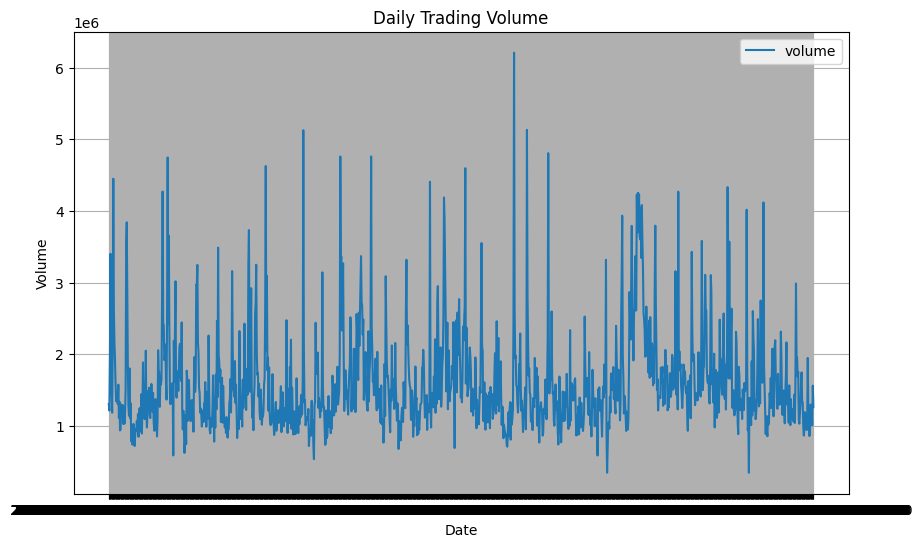

In [ ]:
# fig = px.line(stock_data, x='Date', y='Volume', title='Daily Trading Volume')
# fig.update_xaxes(title='Date')
# fig.update_yaxes(title='Volume')
# fig.update_layout(template='plotly_dark')
plt.figure(figsize=(10, 6))
plt.plot(stock_data['date'], stock_data['volume'], label='volume')
plt.title('Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()
# fig.show()

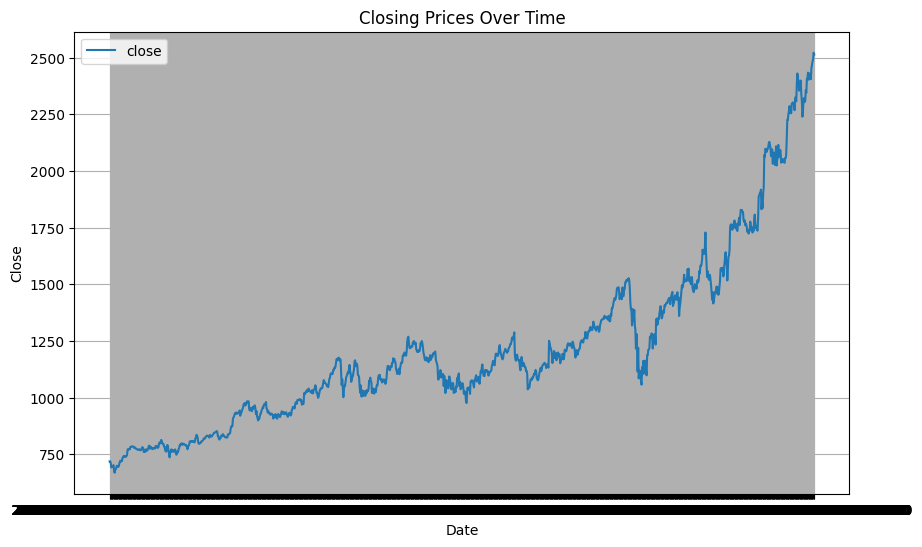

In [ ]:
# fig = px.line(stock_data, x='Date', y='Close', title='Closing Prices Over Time')
# fig.update_xaxes(title='Date')
# fig.update_yaxes(title='Closing Price')
# fig.update_layout(template='plotly_dark')
# fig.show()
plt.figure(figsize=(10, 6))
plt.plot(stock_data['date'], stock_data['close'], label='close')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()

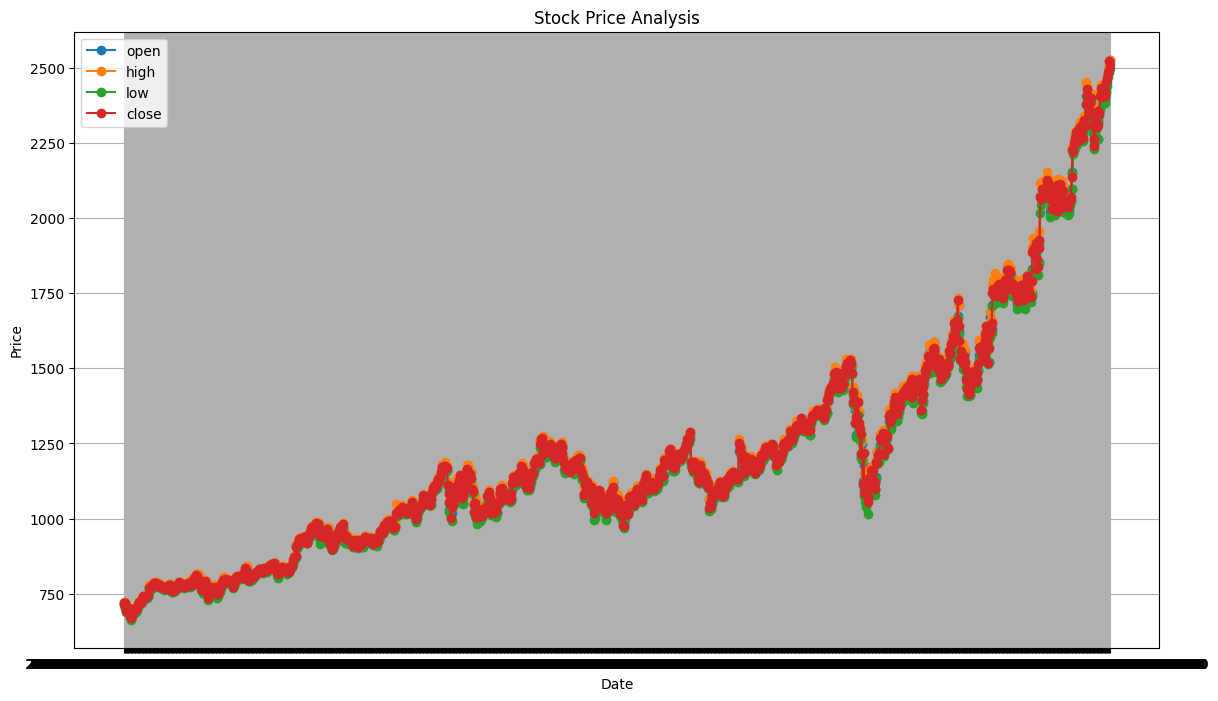

In [ ]:
plt.figure(figsize=(14, 8))

plt.plot(stock_data['date'], stock_data['open'], marker='o', label='open')
plt.plot(stock_data['date'], stock_data['high'], marker='o', label='high')
plt.plot(stock_data['date'], stock_data['low'], marker='o', label='low')
plt.plot(stock_data['date'], stock_data['close'], marker='o', label='close')

plt.title('Stock Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

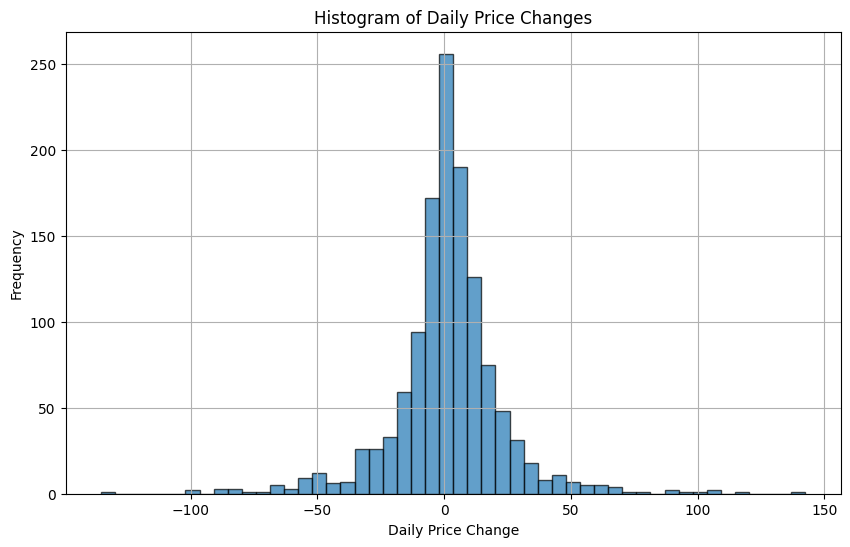

In [ ]:
# stock_data = pd.DataFrame(data)
daily_changes = stock_data['close'].diff()
# 繪製直方圖
plt.figure(figsize=(10, 6))
plt.hist(daily_changes.dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Daily Price Changes')
plt.xlabel('Daily Price Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
stock_data = pd.read_csv('GOOG.csv')

Columns in the CSV file: Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')
First few rows of data:
   symbol                       date   close    high       low    open  \
0   GOOG  2016-06-14 00:00:00+00:00  718.27  722.47  713.1200  716.48   
1   GOOG  2016-06-15 00:00:00+00:00  718.92  722.98  717.3100  719.00   
2   GOOG  2016-06-16 00:00:00+00:00  710.36  716.65  703.2600  714.91   
3   GOOG  2016-06-17 00:00:00+00:00  691.72  708.82  688.4515  708.65   
4   GOOG  2016-06-20 00:00:00+00:00  693.71  702.48  693.4100  698.77   

    volume  adjClose  adjHigh    adjLow  adjOpen  adjVolume  divCash  \
0  1306065    718.27   722.47  713.1200   716.48    1306065      0.0   
1  1214517    718.92   722.98  717.3100   719.00    1214517      0.0   
2  1982471    710.36   716.65  703.2600   714.91    1982471      0.0   
3  3402357    691.72   708.82  688.4515   7

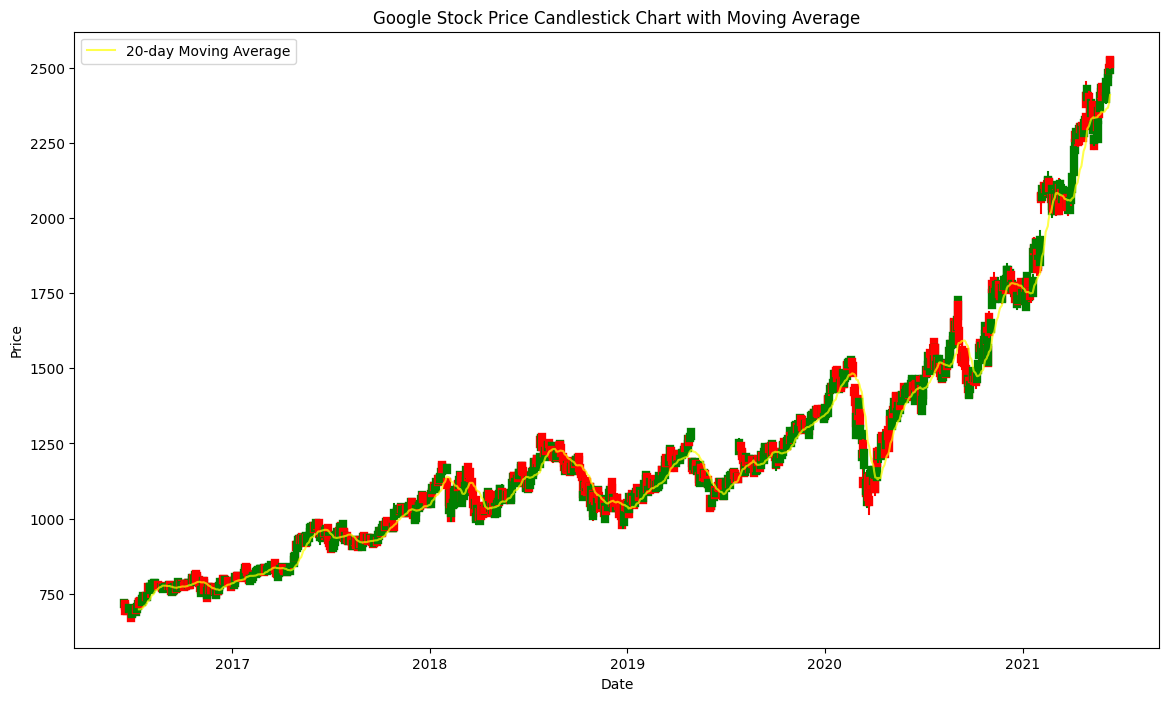

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
stock_data = pd.read_csv('GOOG.csv')

# 確認日期欄位名稱
print("Columns in the CSV file:", stock_data.columns)

# 將日期列名稱修改為 'date'
if 'date' not in stock_data.columns:
    stock_data.rename(columns={'Date': 'date'}, inplace=True)

# 檢查前幾行數據
print("First few rows of data:\n", stock_data.head())

# 將 'date' 欄位轉換成 datetime 格式
stock_data['date'] = pd.to_datetime(stock_data['date'], errors='coerce')

# 檢查日期轉換過程中的異常值
print("Number of null dates after conversion:", stock_data['date'].isnull().sum())

# 丟棄轉換過程中出現 NaT 的行
stock_data.dropna(subset=['date'], inplace=True)

# 設置日期為索引
stock_data.set_index('date', inplace=True)

# 確認日期轉換是否成功
print("Data types of the DataFrame:\n", stock_data.dtypes)

# 計算20日移動平均線
stock_data['20-day MA'] = stock_data['close'].rolling(window=20).mean()

# 確認20日移動平均線計算是否成功
print("First few rows with 20-day MA:\n", stock_data[['close', '20-day MA']].head(25))

# 繪製K線圖和20日移動平均線
fig, ax = plt.subplots(figsize=(14, 8))

# 繪製K線圖
for i in range(len(stock_data)):
    color = 'green' if stock_data['close'][i] >= stock_data['open'][i] else 'red'
    ax.plot([stock_data.index[i], stock_data.index[i]], [stock_data['low'][i], stock_data['high'][i]], color=color)
    ax.plot([stock_data.index[i], stock_data.index[i]], [stock_data['open'][i], stock_data['close'][i]], color=color, linewidth=6)

# 繪製20日移動平均線
ax.plot(stock_data.index, stock_data['20-day MA'], label='20-day Moving Average', color='yellow', alpha=0.7)

# 設置標題和標籤
ax.set_title("Google Stock Price Candlestick Chart with Moving Average")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()

# 格式化日期：主要刻度顯示年份，次要刻度顯示月份


In [ ]:
stock_data = stock_data.drop('20-day MA', axis=1)

# Data Preprocessing

In [ ]:
stock_data = pd.read_csv('GOOG.csv')

In [ ]:
print(stock_data.columns)

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')


In [ ]:
stock = stock_data[['date', 'open', 'high', 'low', 'close', 'volume']]

# Data Normalization
1. Initialize a Min-Max Scaler using MinMaxScaler().
2. Create a copy of the 'stock' DataFrame containing columns ('open', 'high', 'low', 'volume', 'close').
3. Use the scaler to fit and transform the data, performing Min-Max normalization.

In [ ]:
scaler = MinMaxScaler()
normalized_data = stock[['open', 'high', 'low', 'volume', 'close']].copy()
normalized_data = scaler.fit_transform(normalized_data)

# Data Splitting
1. Split the normalized data into training and testing sets using train_test_split. The testing set size is set to 20% of the data, and shuffle is set to False to maintain the chronological order.

2. Create a DataFrame 'train_df' containing the training data with columns (date, close, high, low, open, volume).

3. Create a DataFrame 'test_df' containing the testing data with columns (date, close, high, low, open, volume).

In [ ]:
train_data, test_data = train_test_split(normalized_data, test_size=0.2, shuffle=False)

In [ ]:
train_df = pd.DataFrame(train_data, columns=['open', 'high', 'low', 'volume', 'close'])
test_df = pd.DataFrame(test_data, columns=['open', 'high', 'low', 'volume', 'close'])

# Sequence Generation
1. Define a function named generate_sequences that takes a DataFrame df and an optional parameter seq_length (default is 50).

2. Extract the relevant columns ('open', 'high', 'low', 'volume', 'close') from the DataFrame df and reset the index.

3. Initialize empty lists sequences and labels to store the sequences and labels for training.

4. Iterate through the data using a sliding window approach. For each index, append the next seq_length rows as a sequence and the corresponding last row as the label.

5. Convert the lists of sequences and labels into NumPy arrays.

6. Return the generated sequences and labels.

Then we generate sequences and labels for training data using generate_sequences function on 'train_df' DataFrame.

And next, we generate sequences and labels for testing data using generate_sequences function on 'test_df' DataFrame

In [ ]:
def generate_sequences(df, seq_length=50):
    X = df[['open', 'high', 'low', 'volume', 'close']].reset_index(drop=True)
    y = df[['open', 'high', 'low', 'volume', 'close']].reset_index(drop=True)

    sequences = []
    labels = []

    for index in range(len(X) - seq_length + 1):
        sequences.append(X.iloc[index : index + seq_length].values)
        labels.append(y.iloc[index + seq_length - 1].values)

    sequences = np.array(sequences)
    labels = np.array(labels)

    return sequences, labels

In [ ]:
train_sequences, train_labels = generate_sequences(train_df)
test_sequences, test_labels = generate_sequences(test_df)

# Model Architecture


In [ ]:
lstm_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(50, 5)),
    Dropout(0.3),
    LSTM(units=50, return_sequences=True),
    Dropout(0.3),
    LSTM(units=50),
    Dropout(0.3),
    Dense(units=5)
])

# Compile and Summary
1. Compile the model for training using the mean squared error as the loss function and the Adam optimizer. Additionally, track the mean absolute error as a metric.

Loss Function: Mean Squared Error
Optimizer: Adam
Metrics: Mean Absolute Error
2. Display a summary of the model's architecture and parameters.

In [ ]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 5)                 2

# Model Training
1. Set the number of training epochs to 200 and the batch size to 32 for training the model.

2. Train the model using the training sequences and labels. During training, the model will run for the specified number of epochs, updating its weights to minimize the loss.

Number of Epochs: 200
Batch Size: 32
Training Data: train_sequences and train_labels
Validation Data: test_sequences and test_labels
Verbose: Display training progress information.

In [ ]:
epochs = 200
batch_size = 32

history = lstm_model.fit(
    train_sequences,
    train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_sequences, test_labels),
    verbose=1
)

Epoch 1/200
30/30 [==============================] - 10s 118ms/step - loss: 0.0120 - mean_absolute_error: 0.0784 - val_loss: 0.0445 - val_mean_absolute_error: 0.1904
Epoch 2/200
30/30 [==============================] - 2s 75ms/step - loss: 0.0060 - mean_absolute_error: 0.0527 - val_loss: 0.0191 - val_mean_absolute_error: 0.1151
Epoch 3/200
30/30 [==============================] - 2s 74ms/step - loss: 0.0056 - mean_absolute_error: 0.0488 - val_loss: 0.0203 - val_mean_absolute_error: 0.1229
Epoch 4/200
30/30 [==============================] - 3s 99ms/step - loss: 0.0049 - mean_absolute_error: 0.0458 - val_loss: 0.0116 - val_mean_absolute_error: 0.0871
Epoch 5/200
30/30 [==============================] - 3s 104ms/step - loss: 0.0047 - mean_absolute_error: 0.0448 - val_loss: 0.0106 - val_mean_absolute_error: 0.0856
Epoch 6/200
30/30 [==============================] - 2s 74ms/step - loss: 0.0044 - mean_absolute_error: 0.0422 - val_loss: 0.0086 - val_mean_absolute_error: 0.0748
Epoch 7/200
3

# LSTM Model Evalution

In [ ]:
# Evaluate LSTM model
from sklearn.metrics import r2_score
lstm_test_loss, lstm_test_mae = lstm_model.evaluate(test_sequences, test_labels)
print(f'LSTM Test Loss: {lstm_test_loss}, LSTM Test MAE: {lstm_test_mae}')

# 使用模型進行預測
lstm_predictions = lstm_model.predict(test_sequences)

# 計算決定係數（R²）
r2 = r2_score(test_labels, lstm_predictions)
print(f'LSTM Test R²: {r2}')

7/7 [==============================] - 0s 39ms/step - loss: 3.1863e-04 - mean_absolute_error: 0.0130
LSTM Test Loss: 0.000318631820846349, LSTM Test MAE: 0.013000981882214546
7/7 [==============================] - 0s 37ms/step
LSTM Test R²: 0.976651943946694


generate predictions on two separate datasets

In [ ]:
train_predictions = lstm_model.predict(train_sequences)
lstm_test_predictions = lstm_model.predict(test_sequences)

7/7 [==============================] - 0s 21ms/step


Draw figure

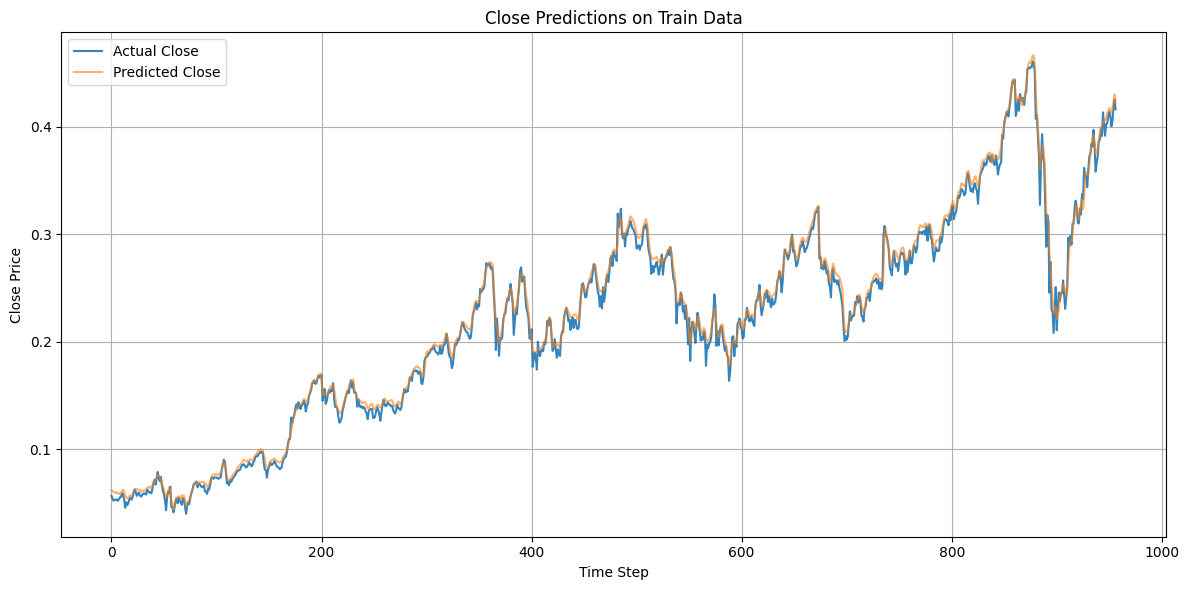

In [ ]:
import matplotlib.pyplot as plt

# Extract actual and predicted close prices
train_close_actual = train_labels[:, 0]
train_close_pred = train_predictions[:, 0]

# Create the time series plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot actual close prices
plt.plot(train_close_actual, label='Actual Close', alpha=0.9)

# Plot predicted close prices with slightly lower opacity
plt.plot(train_close_pred, label='Predicted Close', alpha=0.6)

# Set labels and title
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.title('Close Predictions on Train Data')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Next 10 Days Predictions
1. Initialize an empty list latest_prediction to store the model's predictions.

2. Extract the last sequence of the test data using test_sequences[:-1].

3. Loop 10 times to predict the next values. In each iteration, predict the next sequence using the model and append the prediction to latest_prediction.

In [ ]:
latest_prediction = []
last_seq = test_sequences[:-1]

for _ in range(10):
    prediction = lstm_model.predict(last_seq)
    latest_prediction.append(prediction)

7/7 [==============================] - 0s 21ms/step


Columns in the CSV file: Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')
Number of null dates after conversion: 0
Data types of the DataFrame:
 symbol          object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object
1/1 [==============================] - 0s 41ms/step


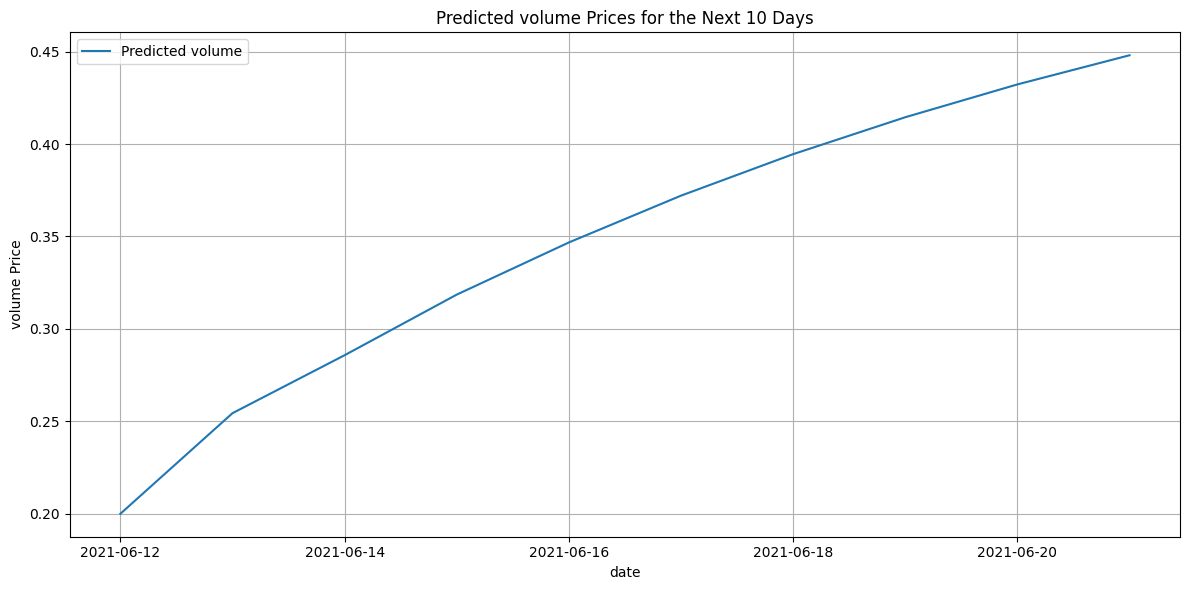

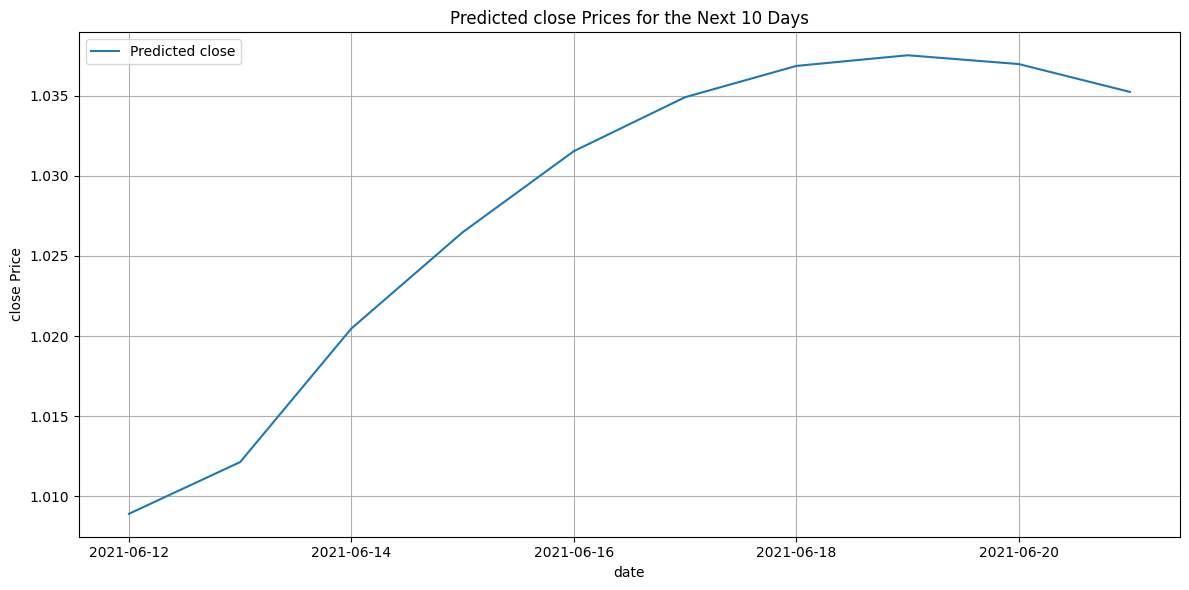

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import date2num, DateFormatter


# Load the data
stock_data = pd.read_csv('GOOG.csv')

# 確認日期欄位名稱
print("Columns in the CSV file:", stock_data.columns)

# 將日期列名稱修改為 'date'
if 'date' not in stock_data.columns:
    stock_data.rename(columns={'Date': 'date'}, inplace=True)

# 將 'date' 欄位轉換成 datetime 格式
stock_data['date'] = pd.to_datetime(stock_data['date'], errors='coerce')

# 檢查日期轉換過程中的異常值
print("Number of null dates after conversion:", stock_data['date'].isnull().sum())

# 丟棄轉換過程中出現 NaT 的行
stock_data.dropna(subset=['date'], inplace=True)

# 設置日期為索引
stock_data.set_index('date', inplace=True)

# 確認日期轉換是否成功
print("Data types of the DataFrame:\n", stock_data.dtypes)

# Generate predictions for the next 10 days
latest_prediction = []
last_seq = test_sequences[-1]  # The last sequence from test data

for _ in range(10):
    prediction = lstm_model.predict(np.expand_dims(last_seq, axis=0))
    latest_prediction.append(prediction[0])
    last_seq = np.roll(last_seq, -1, axis=0)
    last_seq[-1] = prediction[0]  # Update the last step with the latest prediction

# Extract the last date from the original dataset
last_date = stock_data.index[-1]  # 已經設置為日期索引

# Generate list of dates for next 10 days
next_10_days = [last_date + timedelta(days=i) for i in range(1, 11)]

# Convert dates to numerical format for plotting
dates_num = date2num(next_10_days)

# Convert the predictions list to a numpy array for easier indexing
predicted_data_next = np.array(latest_prediction)

# Extract predicted data for specific features (volume, close)
predicted_volume = predicted_data_next[:, 3]  # Assuming volume is at index 3
predicted_close = predicted_data_next[:, 4]  # Assuming close is at index 4

# Create separate plots for volume and close price
feature_names = ['volume', 'close']
predicted_data = [predicted_volume, predicted_close]

for i, feature_name in enumerate(feature_names):
    predicted_feature = predicted_data[i][:len(dates_num)]

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(dates_num, predicted_feature, label=f'Predicted {feature_name}')
    plt.xlabel('date')
    plt.ylabel(f'{feature_name} Price')
    plt.title(f'Predicted {feature_name} Prices for the Next 10 Days')
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.tight_layout()
    plt.show()


# Create And Training RNN model

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# Build the RNN model with Dropout layers
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(train_sequences.shape[1], train_sequences.shape[2]), return_sequences=False))
rnn_model.add(Dropout(0.3))  # Add Dropout layer with dropout rate of 0.3
rnn_model.add(Dense(50, activation='relu'))
rnn_model.add(Dropout(0.3))  # Add another Dropout layer with dropout rate of 0.3
rnn_model.add(Dense(5))  # Output layer with 5 neurons for 'Open', 'High', 'Low', 'Volume', 'Close'

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = rnn_model.fit(train_sequences, train_labels, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_mae = rnn_model.evaluate(test_sequences, test_labels)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')


Epoch 1/200
24/24 [==============================] - 2s 22ms/step - loss: 0.0664 - mae: 0.1852 - val_loss: 0.0262 - val_mae: 0.1439
Epoch 2/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0149 - mae: 0.0933 - val_loss: 0.0127 - val_mae: 0.0971
Epoch 3/200
24/24 [==============================] - 0s 12ms/step - loss: 0.0093 - mae: 0.0728 - val_loss: 0.0118 - val_mae: 0.0967
Epoch 4/200
24/24 [==============================] - 0s 12ms/step - loss: 0.0077 - mae: 0.0664 - val_loss: 0.0097 - val_mae: 0.0877
Epoch 5/200
24/24 [==============================] - 0s 12ms/step - loss: 0.0062 - mae: 0.0594 - val_loss: 0.0066 - val_mae: 0.0707
Epoch 6/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0055 - mae: 0.0559 - val_loss: 0.0063 - val_mae: 0.0704
Epoch 7/200
24/24 [==============================] - 0s 12ms/step - loss: 0.0049 - mae: 0.0518 - val_loss: 0.0056 - val_mae: 0.0659
Epoch 8/200
24/24 [==============================] - 0s 12ms/step - loss: 0.

# RNN model evaluation

In [ ]:
# Evaluate RNN model
from sklearn.metrics import r2_score
rnn_test_loss, rnn_test_mae = rnn_model.evaluate(test_sequences, test_labels)
print(f'RNN Test Loss: {rnn_test_loss}, RNN Test MAE: {rnn_test_mae}')

# 使用模型進行預測
rnn_predictions = rnn_model.predict(test_sequences)

# 計算決定係數（R²）
r2 = r2_score(test_labels, rnn_predictions)
print(f'RNN Test R²: {r2}')

7/7 [==============================] - 0s 5ms/step - loss: 0.0075 - mae: 0.0766
RNN Test Loss: 0.007535092998296022, RNN Test MAE: 0.07660562545061111
7/7 [==============================] - 0s 4ms/step
RNN Test R²: 0.706288844954938


generate predictions on two separate datasets

In [ ]:
train_predictions = rnn_model.predict(train_sequences)
rnn_test_predictions = rnn_model.predict(test_sequences)

7/7 [==============================] - 0s 7ms/step


draw a figure

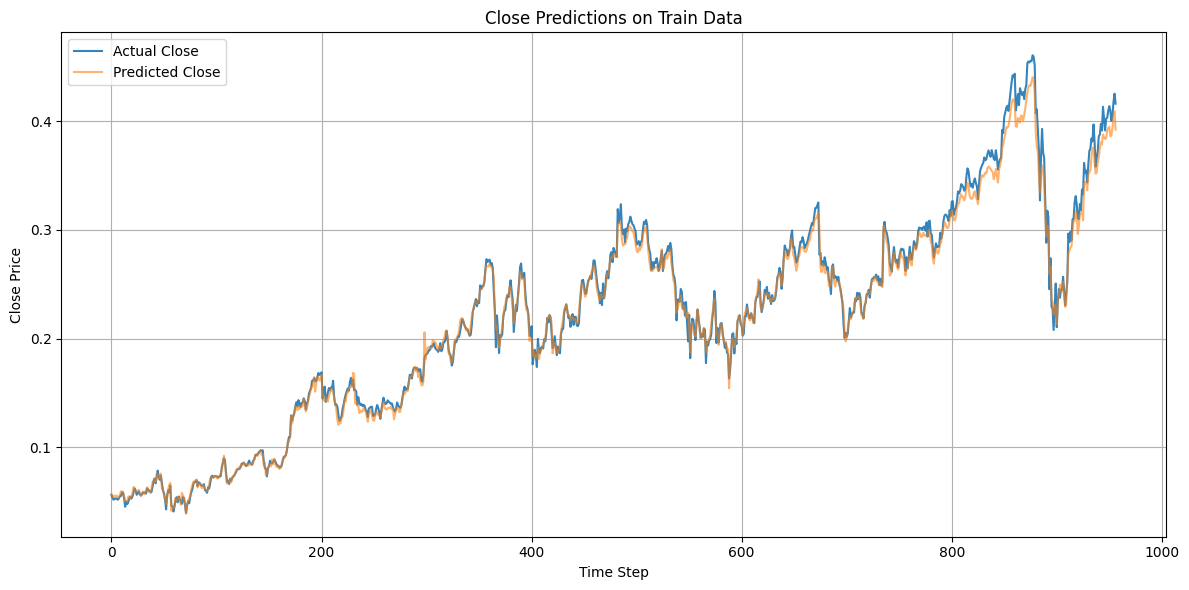

In [ ]:
import matplotlib.pyplot as plt

# Extract actual and predicted close prices
train_close_actual = train_labels[:, 0]
train_close_pred = train_predictions[:, 0]

# Create the time series plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot actual close prices
plt.plot(train_close_actual, label='Actual Close', alpha=0.9)

# Plot predicted close prices with slightly lower opacity
plt.plot(train_close_pred, label='Predicted Close', alpha=0.6)

# Set labels and title
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.title('Close Predictions on Train Data')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Next 10 Days Predictions

Columns in the CSV file: Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')
Number of null dates after conversion: 0
Data types of the DataFrame:
 symbol          object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object
1/1 [==============================] - 0s 30ms/step


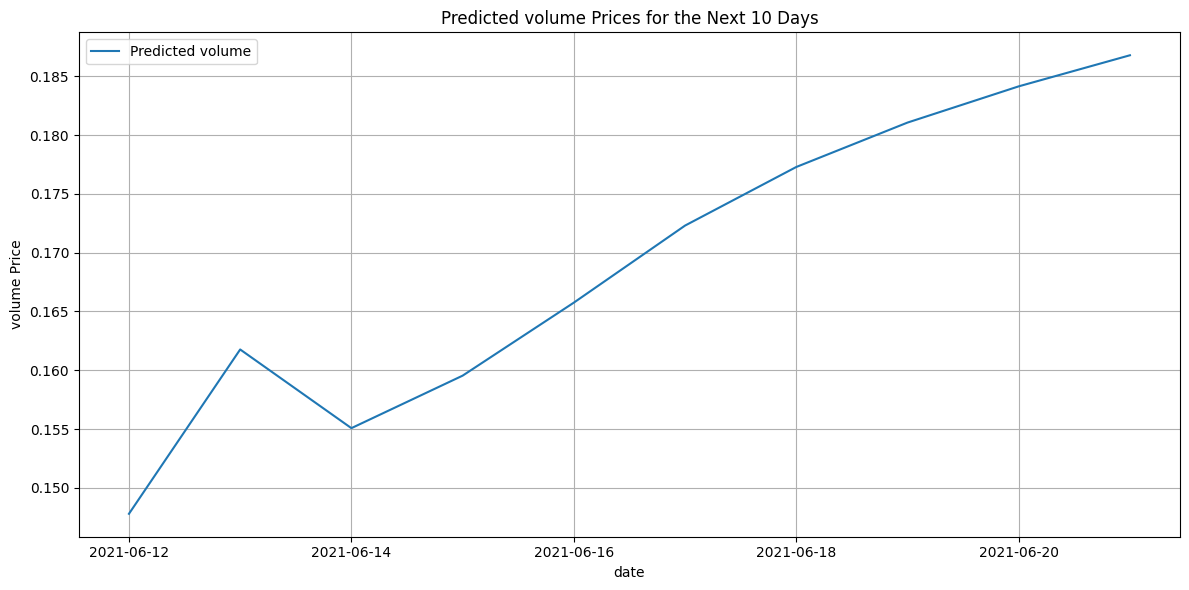

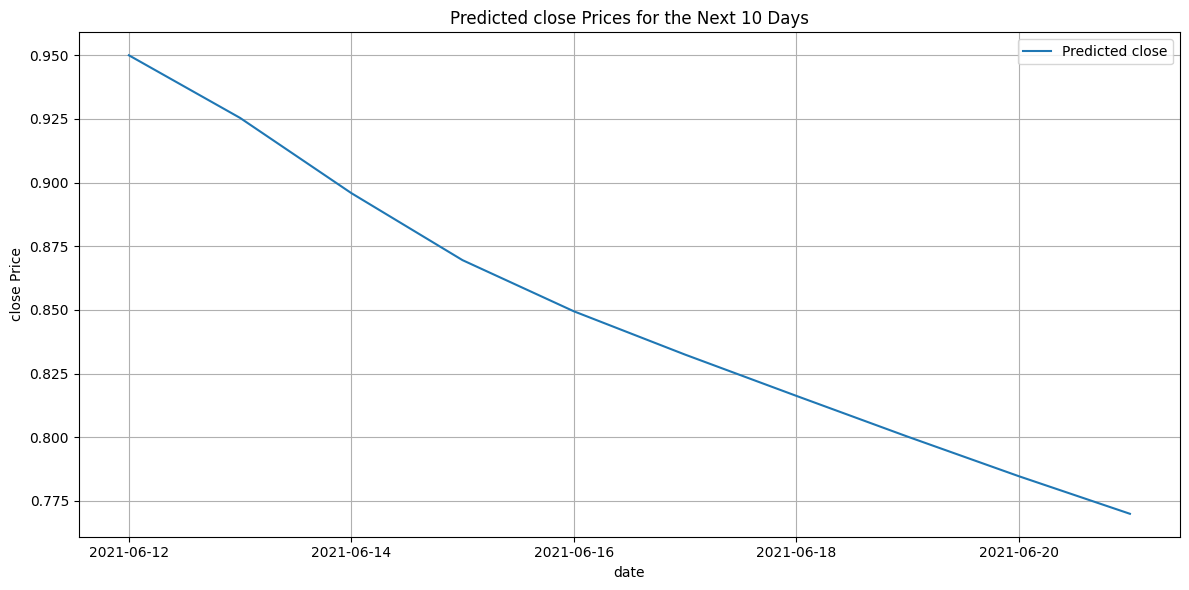

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import date2num, DateFormatter


# Load the data
stock_data = pd.read_csv('GOOG.csv')

# 確認日期欄位名稱
print("Columns in the CSV file:", stock_data.columns)

# 將日期列名稱修改為 'date'
if 'date' not in stock_data.columns:
    stock_data.rename(columns={'Date': 'date'}, inplace=True)

# 將 'date' 欄位轉換成 datetime 格式
stock_data['date'] = pd.to_datetime(stock_data['date'], errors='coerce')

# 檢查日期轉換過程中的異常值
print("Number of null dates after conversion:", stock_data['date'].isnull().sum())

# 丟棄轉換過程中出現 NaT 的行
stock_data.dropna(subset=['date'], inplace=True)

# 設置日期為索引
stock_data.set_index('date', inplace=True)

# 確認日期轉換是否成功
print("Data types of the DataFrame:\n", stock_data.dtypes)

# Generate predictions for the next 10 days
latest_prediction = []
last_seq = test_sequences[-1]  # The last sequence from test data

for _ in range(10):
    prediction = lstm_model.predict(np.expand_dims(last_seq, axis=0))
    latest_prediction.append(prediction[0])
    last_seq = np.roll(last_seq, -1, axis=0)
    last_seq[-1] = prediction[0]  # Update the last step with the latest prediction

# Extract the last date from the original dataset
last_date = stock_data.index[-1]  # 已經設置為日期索引

# Generate list of dates for next 10 days
next_10_days = [last_date + timedelta(days=i) for i in range(1, 11)]

# Convert dates to numerical format for plotting
dates_num = date2num(next_10_days)

# Convert the predictions list to a numpy array for easier indexing
predicted_data_next = np.array(latest_prediction)

# Extract predicted data for specific features (volume, close)
predicted_volume = predicted_data_next[:, 3]  # Assuming volume is at index 3
predicted_close = predicted_data_next[:, 4]  # Assuming close is at index 4

# Create separate plots for volume and close price
feature_names = ['volume', 'close']
predicted_data = [predicted_volume, predicted_close]

for i, feature_name in enumerate(feature_names):
    predicted_feature = predicted_data[i][:len(dates_num)]

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(dates_num, predicted_feature, label=f'Predicted {feature_name}')
    plt.xlabel('date')
    plt.ylabel(f'{feature_name} Price')
    plt.title(f'Predicted {feature_name} Prices for the Next 10 Days')
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.tight_layout()
    plt.show()


# Compare the prediction

7/7 [==============================] - 0s 5ms/step - loss: 0.0026 - mae: 0.0461
RNN Test Loss: 0.0025883461348712444, RNN Test MAE: 0.046132892370224
7/7 [==============================] - 0s 23ms/step - loss: 6.3518e-04 - mean_absolute_error: 0.0201
LSTM Test Loss: 0.0006351796328090131, LSTM Test MAE: 0.020060734823346138
7/7 [==============================] - 0s 25ms/step


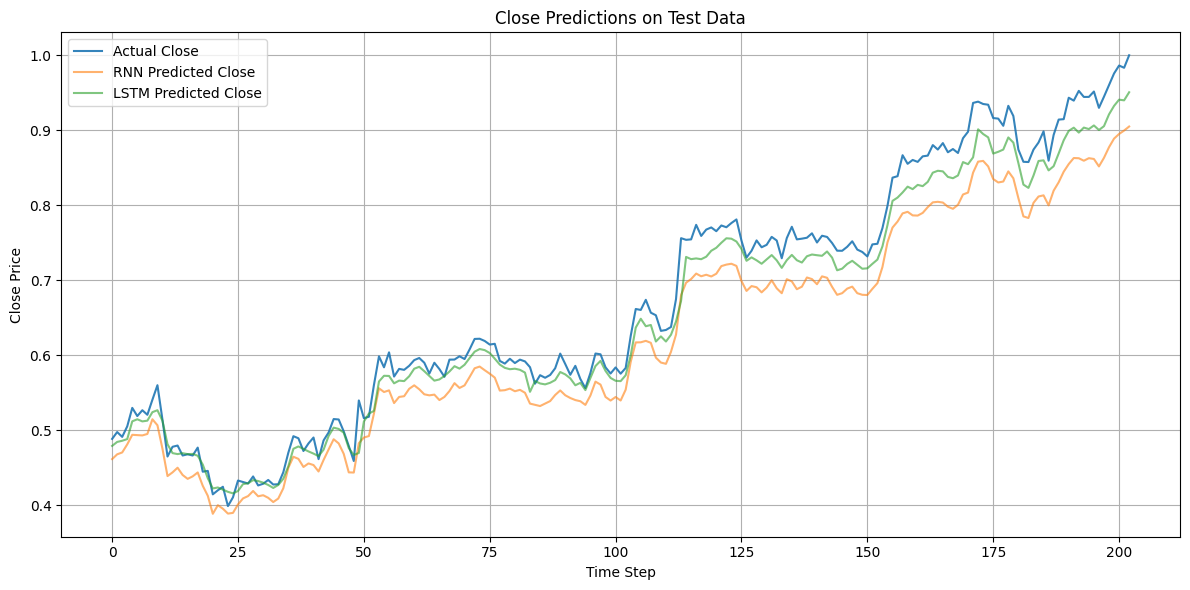

In [ ]:
# Evaluate RNN model
rnn_test_loss, rnn_test_mae = rnn_model.evaluate(test_sequences, test_labels)
print(f'RNN Test Loss: {rnn_test_loss}, RNN Test MAE: {rnn_test_mae}')

# Evaluate LSTM model
lstm_test_loss, lstm_test_mae = lstm_model.evaluate(test_sequences, test_labels)
print(f'LSTM Test Loss: {lstm_test_loss}, LSTM Test MAE: {lstm_test_mae}')

# Make predictions on the test data
rnn_test_predictions = rnn_model.predict(test_sequences)
lstm_test_predictions = lstm_model.predict(test_sequences)

# Extract actual and predicted close prices for comparison
test_close_actual = test_labels[:, 0]
rnn_test_close_pred = rnn_test_predictions[:, 0]
lstm_test_close_pred = lstm_test_predictions[:, 0]

# Plot the predictions
plt.figure(figsize=(12, 6))

# Plot actual close prices
plt.plot(test_close_actual, label='Actual Close', alpha=0.9)

# Plot RNN predicted close prices
plt.plot(rnn_test_close_pred, label='RNN Predicted Close', alpha=0.6)

# Plot LSTM predicted close prices
plt.plot(lstm_test_close_pred, label='LSTM Predicted Close', alpha=0.6)

# Set labels and title
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.title('Close Predictions on Test Data')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
